In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


file="host"
traindir="datasets/multiclass_train"
testdir="datasets/multiclass_test"

traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
testdata
traindata
n=len(traindata.count())
print(f"no of attributes are {n}")

Using TensorFlow backend.


no of attributes are 15


In [2]:
X = traindata.iloc[:,0:n-5]
Y = traindata.iloc[:,n-5:n]
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
Y.shape

(125973, 5)

In [3]:
# 1. define the network
model = Sequential()
model.add(Dense(32,input_dim=n-5,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(5, activation='softmax'))

In [4]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X, Y,batch_size=4000,epochs=100,validation_split=0.2)

model.save(f"{testdir}/processed/{file}.hdf5")

import dill as pickle
with open('history', 'wb') as file_pi:
    pickle.dump(f"{testdir}/processed/{file}.history", file_pi)

Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 0s 4us/step - loss: 1.5412 - accuracy: 0.2405 - val_loss: 1.3399 - val_accuracy: 0.6044
Epoch 2/100
100778/100778 [==============================] - 0s 3us/step - loss: 1.1473 - accuracy: 0.7540 - val_loss: 0.9182 - val_accuracy: 0.8432
Epoch 3/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.7500 - accuracy: 0.8511 - val_loss: 0.5717 - val_accuracy: 0.8634
Epoch 4/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.4819 - accuracy: 0.8663 - val_loss: 0.3958 - val_accuracy: 0.8806
Epoch 5/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3648 - accuracy: 0.8903 - val_loss: 0.3271 - val_accuracy: 0.8993
Epoch 6/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.3141 - accuracy: 0.8987 - val_loss: 0.2910 - val_accuracy: 0.9035
Epoch 7/100
100778/100778 [============================

100778/100778 [==============================] - 0s 2us/step - loss: 0.1384 - accuracy: 0.9545 - val_loss: 0.1332 - val_accuracy: 0.9550
Epoch 56/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1373 - accuracy: 0.9549 - val_loss: 0.1327 - val_accuracy: 0.9557
Epoch 57/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1365 - accuracy: 0.9551 - val_loss: 0.1324 - val_accuracy: 0.9558
Epoch 58/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1367 - accuracy: 0.9556 - val_loss: 0.1315 - val_accuracy: 0.9553
Epoch 59/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1357 - accuracy: 0.9554 - val_loss: 0.1307 - val_accuracy: 0.9570
Epoch 60/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1349 - accuracy: 0.9561 - val_loss: 0.1303 - val_accuracy: 0.9555
Epoch 61/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1345 - accuracy: 0.9562 - val

In [5]:

import tensorflow as tf
C = testdata.iloc[:,0:n-5]
T = testdata.iloc[:,n-5:n]
_, accuracy = model.evaluate(C,T)
print('Accuracy: %.2f' % (accuracy*100))
prediction=model.predict_classes(C)


22542/22542 [==============================] - 0s 14us/step
Accuracy: 69.12


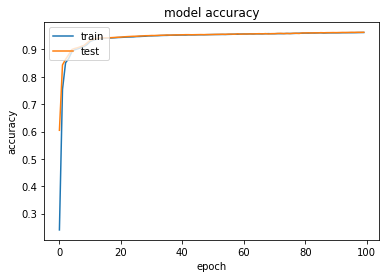

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

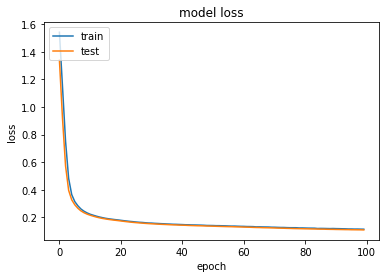

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
p=model.predict(C[0:1])
p=np.rint(p)

print(p)
print(T.shape)
rounded_labels=np.argmax(T.to_numpy(),axis=1)
prediction=model.predict(C)
prediction=np.rint(prediction)
prediction

[[1. 0. 0. 0. 0.]]
(22542, 5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
prediction=np.rint(prediction)
original_value=np.rint(T)
cm=multilabel_confusion_matrix(original_value, prediction)
cm

array([[[14098,   985],
        [ 2338,  5121]],

       [[ 7481,  5351],
        [  682,  9028]],

       [[19699,   422],
        [ 1238,  1183]],

       [[19657,     0],
        [ 2874,    11]],

       [[22475,     0],
        [   67,     0]]], dtype=int64)